# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Load Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

test_df.head()

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Combine datasets

In [3]:
test_df['SalePrice'] = np.nan
df = pd.concat([train_df, test_df], axis=0).set_index('Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0



# Identify columns with missing values

In [4]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:")
print(missing_values)

Missing Values:
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


## Finding of missing values

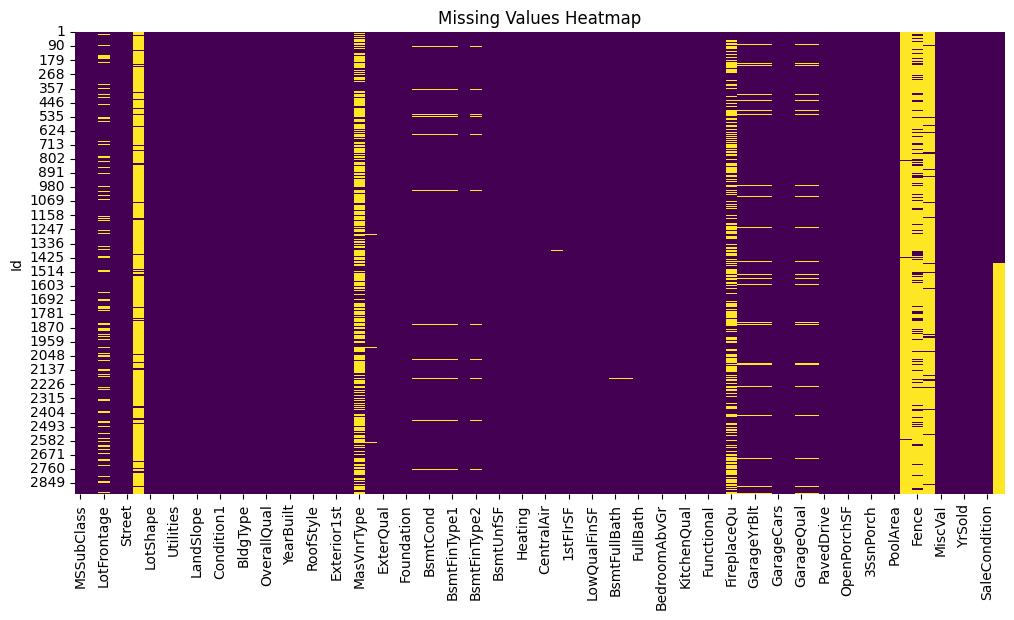

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Dropping columns with excessive missing values (>30%)

In [6]:
thresh = int(0.3 * len(df))
df = df.dropna(thresh=thresh, axis=1)

## Filling missing values

In [7]:
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [9]:
# Creating a new feature: TotalSqFt
features = ['LotArea', 'GarageArea', 'GrLivArea']
df['TotalSqFt'] = df[features].sum(axis=1)

In [10]:
# Splitting dataset back
train_df = df.loc[df.index.isin(train_df.index)]
test_df = df.loc[df.index.isin(test_df.index)].drop(columns=['SalePrice'])

# Feature selection

In [11]:
features = ['TotalSqFt', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'OverallQual']
X = train_df[features]
y = train_df['SalePrice']

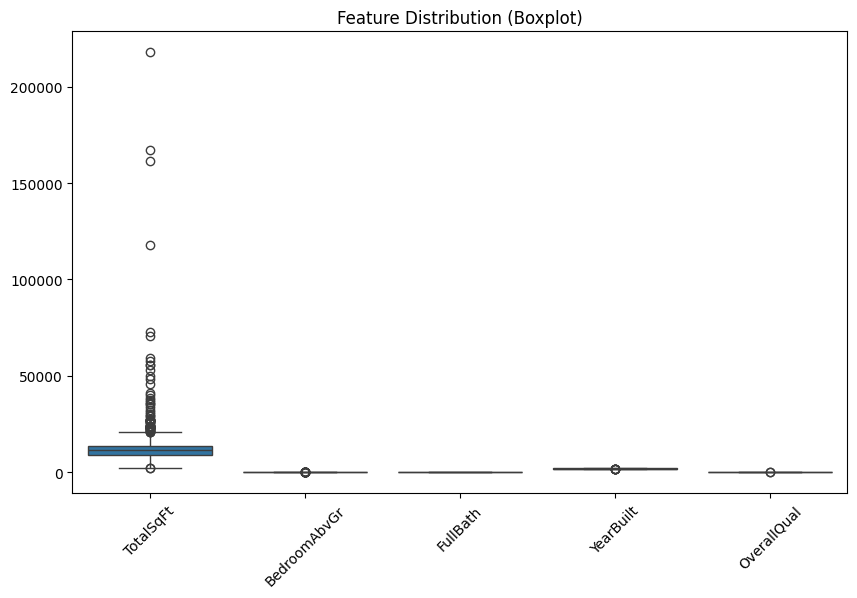

In [12]:
#Plotting Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[features])
plt.title("Feature Distribution (Boxplot)")
plt.xticks(rotation=45)
plt.show()

## Detecting and Removing Outliers using IQR

In [ ]:

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X = X[outlier_mask]
y = y.loc[outlier_mask]

## Feature Scaling

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Vizualizing data

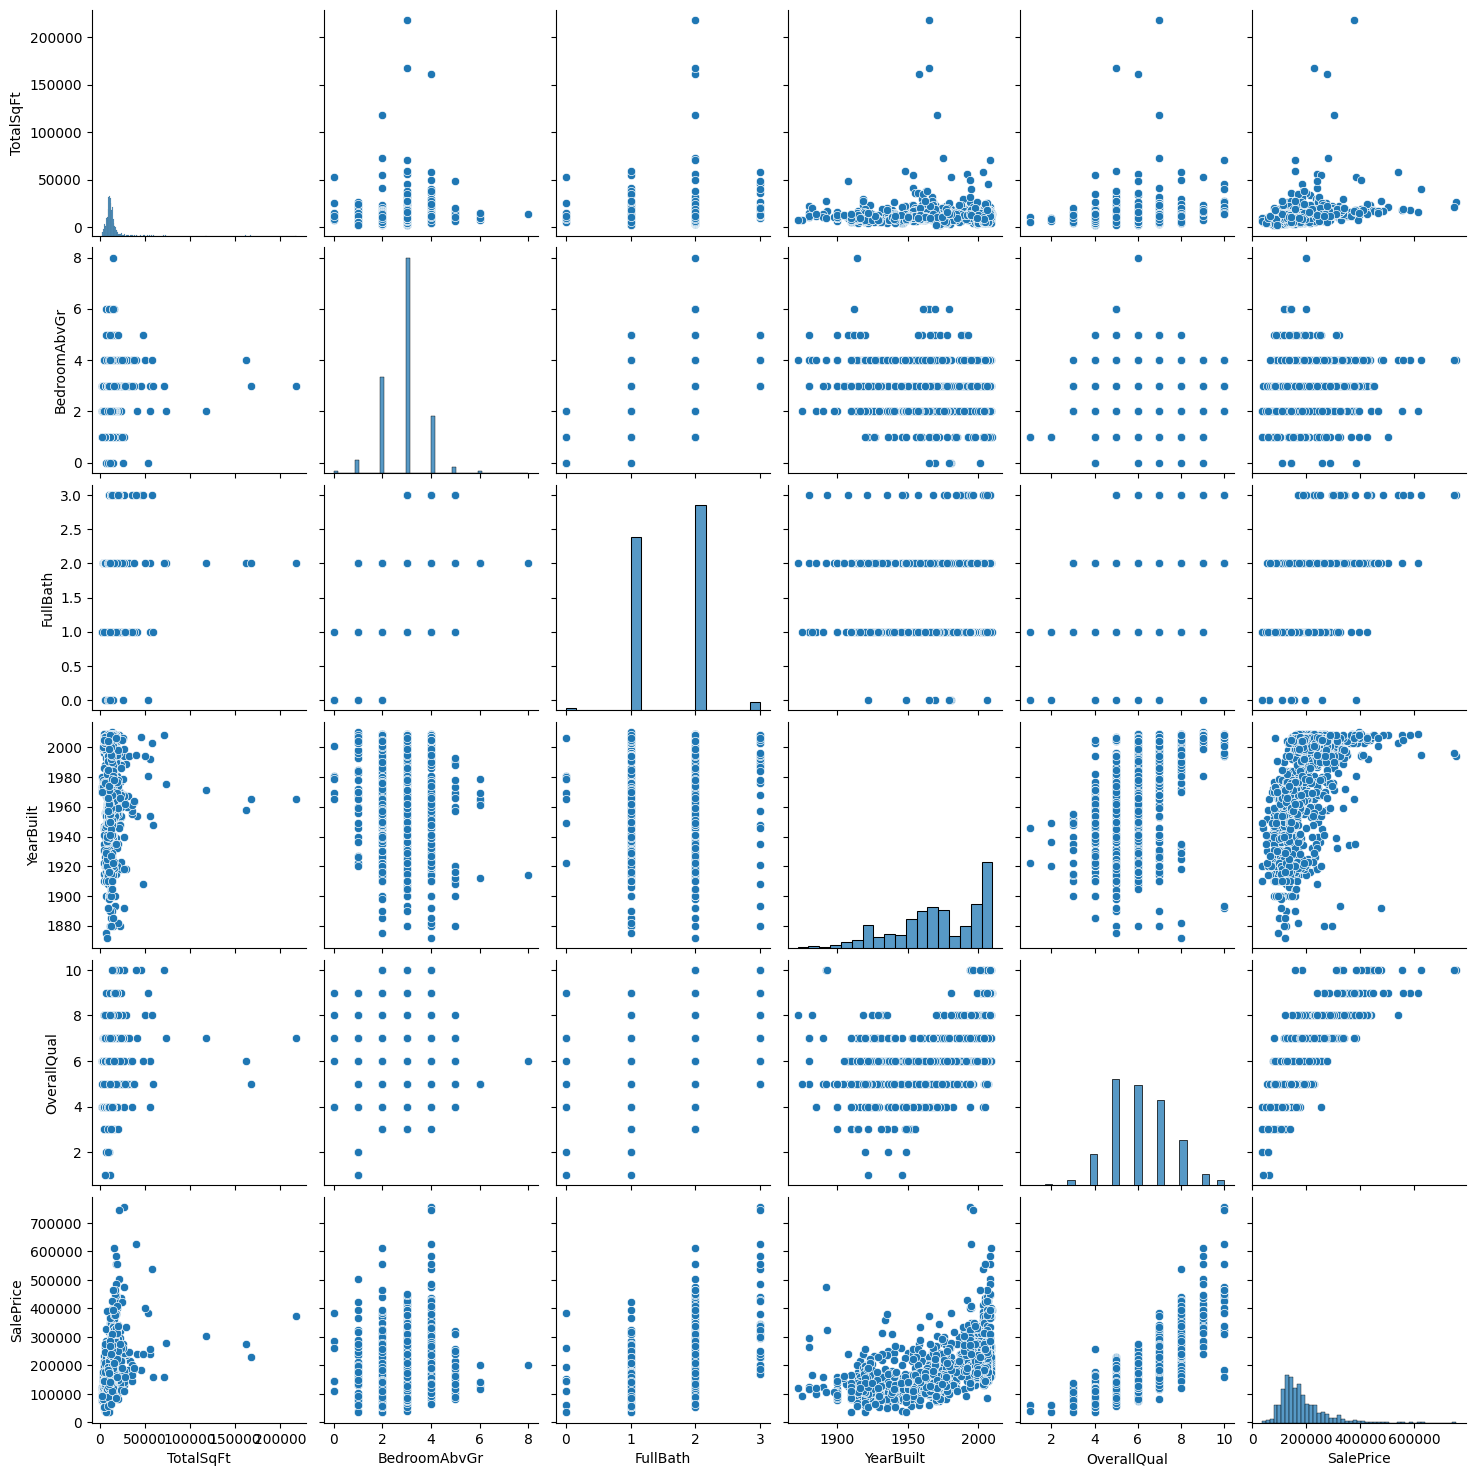

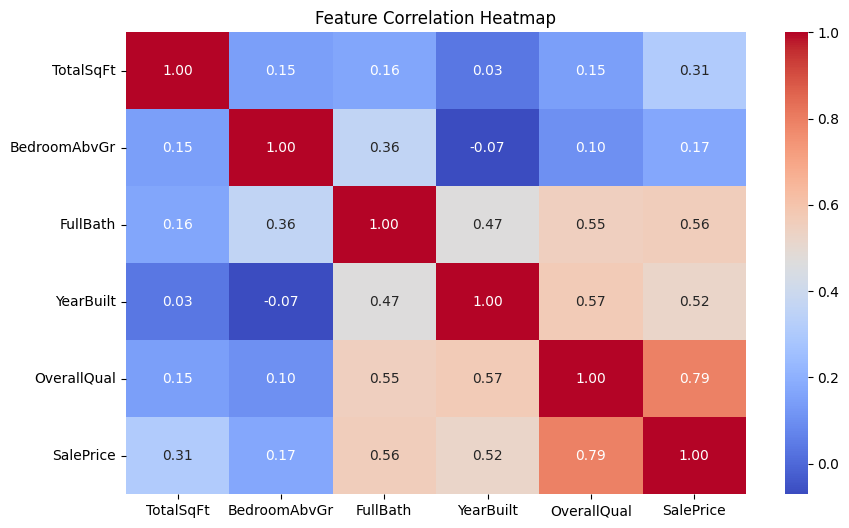

In [15]:
# Pairplot visualization
sns.pairplot(train_df[features + ['SalePrice']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[features + ['SalePrice']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [18]:
# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.8274
MAE: 22023.99
RMSE: 30997.71


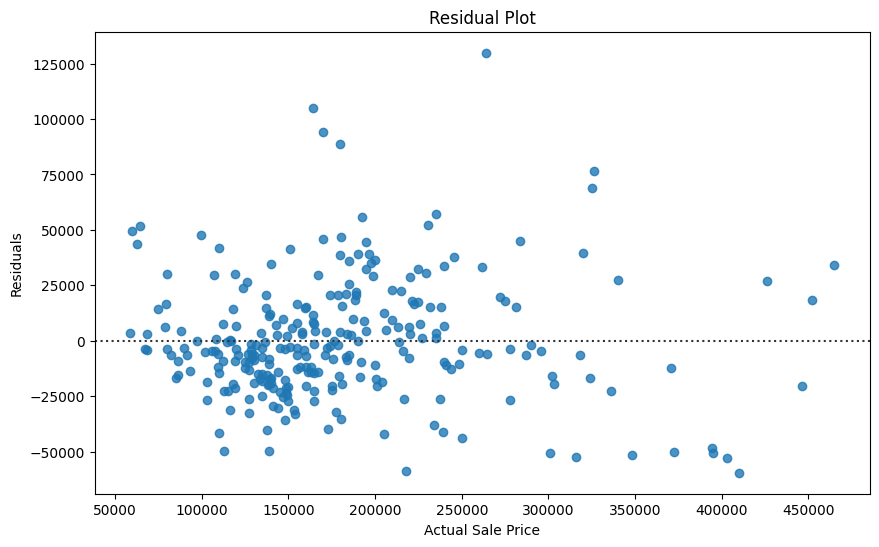

In [19]:
# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred,  line_kws={'color': 'red'})
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [20]:
def predict_house_price(total_sqft, num_bedrooms, num_bathrooms, year_built, quality):
    input_data = np.array([[total_sqft, num_bedrooms, num_bathrooms, year_built, quality]])
    input_data_scaled = scaler.transform(input_data)
    input_data_poly = poly.transform(input_data_scaled)
    prediction = best_model.predict(input_data_poly)
    return prediction[0]

# Predicting Price of a sample 

In [21]:
predicted_price = predict_house_price(4000, 3, 2, 1995, 7)
print(f"Predicted House Price: ${predicted_price:.2f}")

Predicted House Price: $156146.67


c:\Users\DELL\Desktop\house price prediction\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
